## COMP 484 Lab 8
Srishan Shakya

Roll No. 46

CE


# Deep Learning with Convolution Neural Networks

## Types of layers in a CNN
CNNs typically use the following types of layers:
- **Input layer**: This layer takes the raw image data as it is.
- **Convolutional layer**: This layer computes the convolutions between the neurons and the various patches in the input. [quick refresher on image convolutions](http://web.pdx.edu/~jduh/courses/Archive/geog481w07/Students/Ludwig_ImageConvolution.pdf). The convolutional layer basically computes the dot product between the weights and a small patch in the output of the previous layer.
- **Rectified Linear Unit layer**: This layer applies an activation function to the output of the previous layer. This function is usually something like max(0, x). This layer is needed to add non-linearity to the network so that it can generalize well to any type of function.
- **Pooling layer**: This layer samples the output of the previous layer resulting in a structure with smaller dimensions. Pooling helps us to keep only the prominent parts as we progress in the network. Max pooling is frequently used in the pooling layer where we pick the maximum value in a given KxK window. 
- **Fully Connected layer**: This layer computes the output scores in the last layer. The resulting output is of the size 1x1xL, where L is the number of classes in the training dataset.

As we go from the input layer to the output layer in the network, the input image gets transformed from pixel values to the final class scores

## Building a perceptron-based linear regressor

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf # A popular deep learning package

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
# Generate some datapoints and see how to fit a model to it
# Define the number of points to generate
num_points = 1200

In [3]:
# Generate the data using model of line: y = mx + c
data = []
m = 0.2
c = 0.5
for i in range (num_points):
    # Generate 'x'
    x = np.random.normal(0.0, 0.8)
    # Generate some noise to add some variation
    noise = np.random.normal(0.0, 0.04)
    # Compute value of 'y' using the equation
    y = m*x + c + noise
    
    data.append([x, y])

In [4]:
# Separate x and y into input and output variables
x_data = [d[0] for d in data]
y_data = [d[1] for d in data]

Text(0.5, 1.0, 'Input Data')

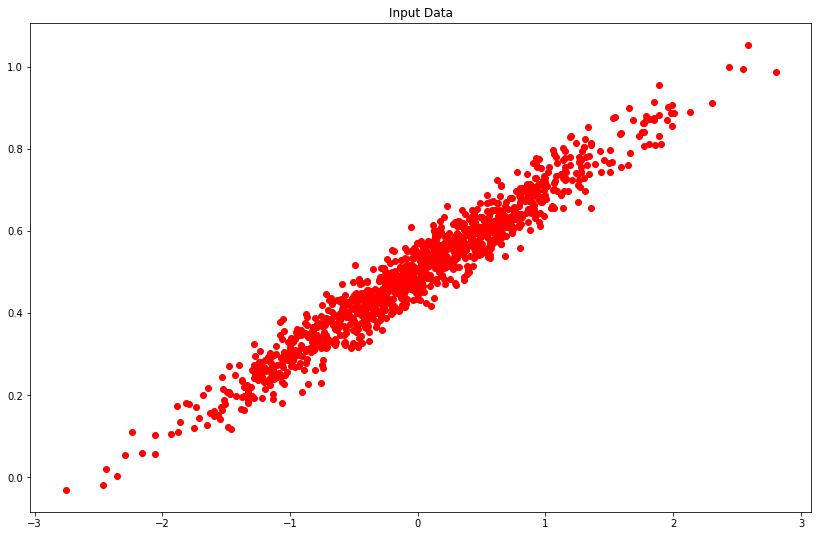

In [5]:
# Plot the generated data
plt.rcParams['figure.figsize'] = [14, 9]
plt.plot(x_data, y_data, 'ro')
plt.title('Input Data')

In [6]:
# Generate weights and biases for the perceptron.
# Uniform random number generator for Weights
# Set Biases to zero
W = tf.Variable(tf.random.uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
# Define the equation for 'y' using TensorFlow variables
y = W * x_data + b

In [8]:
# Define the loss function whose value the optimizer will try to minimize as much as possible

loss = tf.reduce_mean(tf.square(y - y_data))

In [9]:
# Define the gradient descent optimizer and specify the loss function
optimizer = tf.train.GradientDescentOptimizer(0.5)
#optimizer = tf.optimizers.SGD(0.5)
train = optimizer.minimize(loss)

In [10]:
# Initialize all the variables
init = tf.global_variables_initializer()

In [11]:
# Start the TensorFlow session and run it using the initializer
sess = tf.Session()
sess.run(init)


ITERATION 1
W = 0.4726724
b = 0.49367175
loss = 0.04929187


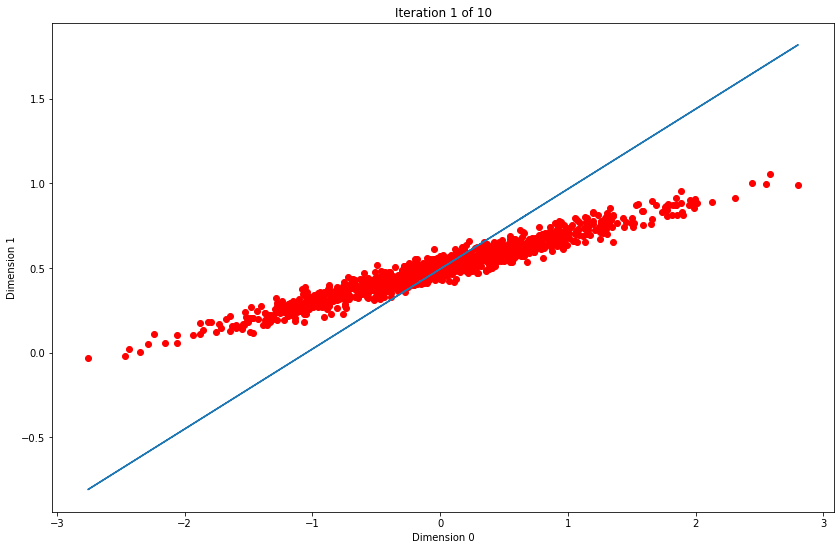


ITERATION 2
W = 0.29728127
b = 0.49739155
loss = 0.0075656055


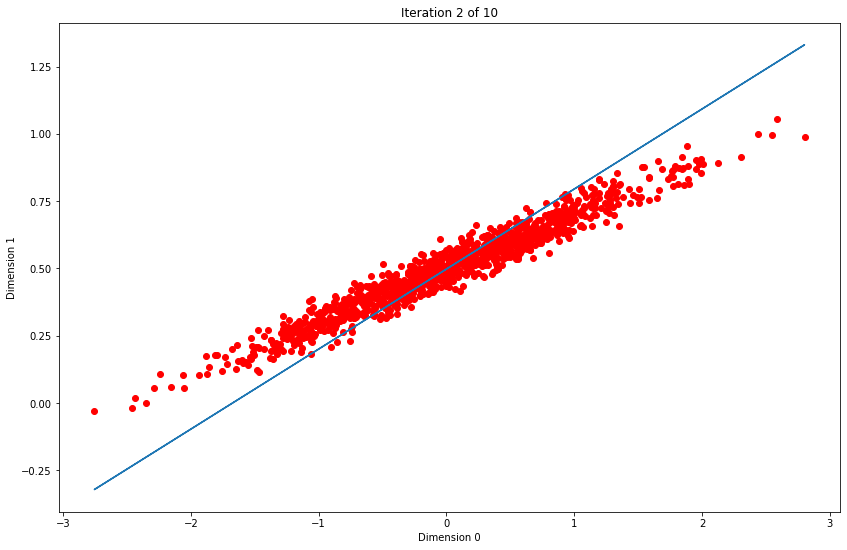


ITERATION 3
W = 0.23487589
b = 0.49874383
loss = 0.0022830158


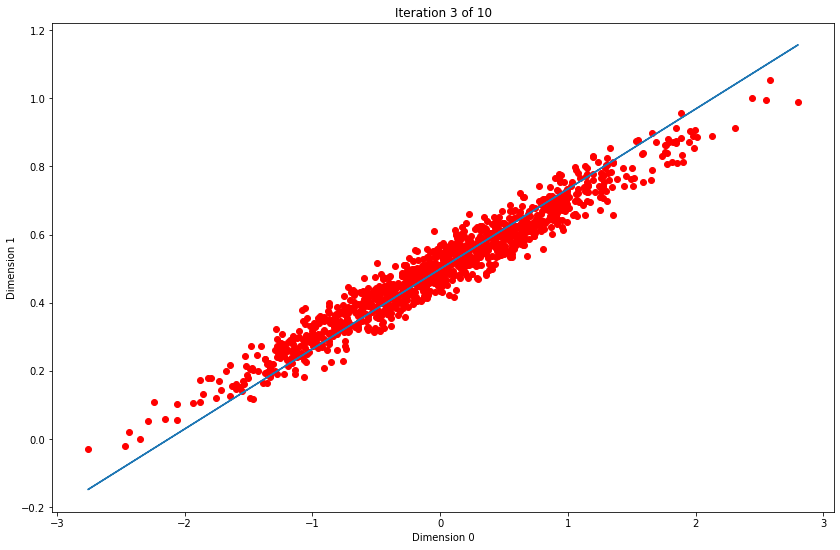


ITERATION 4
W = 0.2126714
b = 0.499225
loss = 0.0016142343


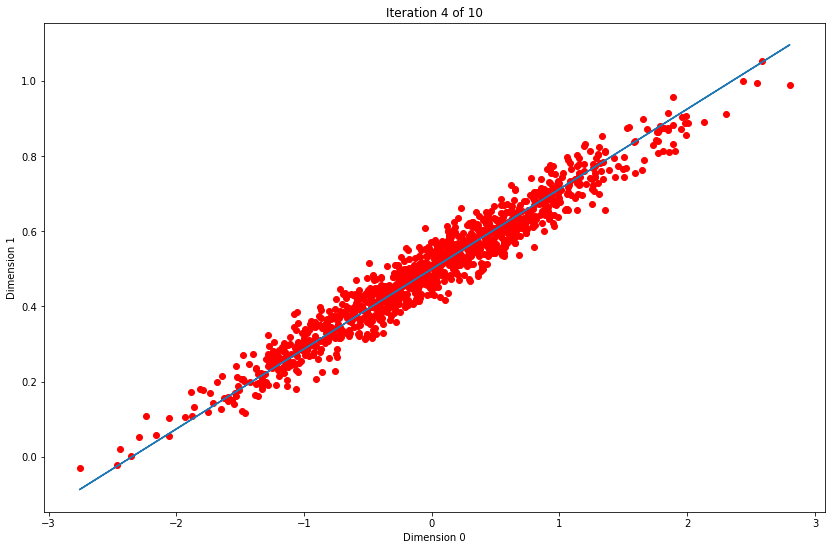


ITERATION 5
W = 0.2047708
b = 0.4993962
loss = 0.0015295659


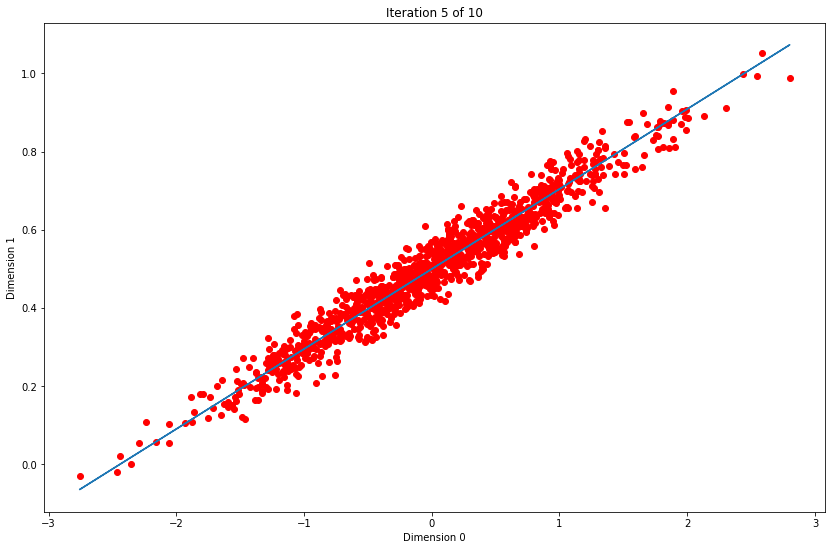


ITERATION 6
W = 0.2019597
b = 0.49945712
loss = 0.001518847


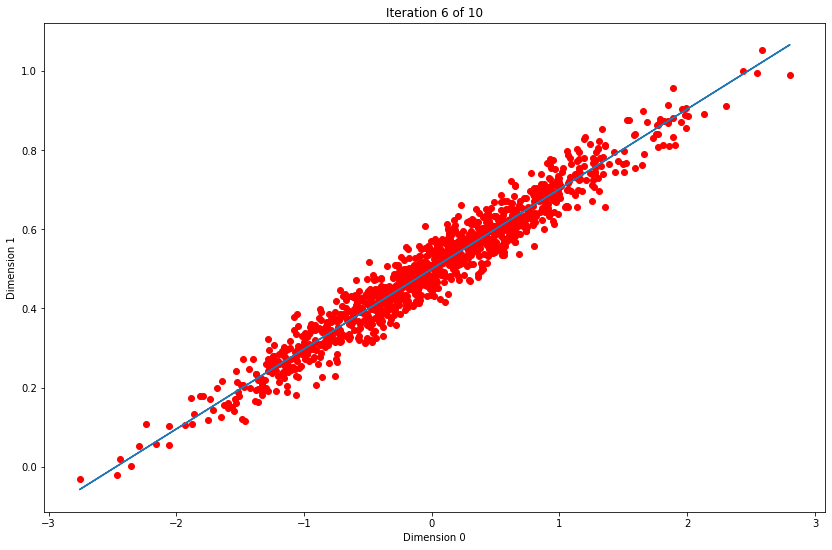


ITERATION 7
W = 0.20095947
b = 0.4994788
loss = 0.0015174899


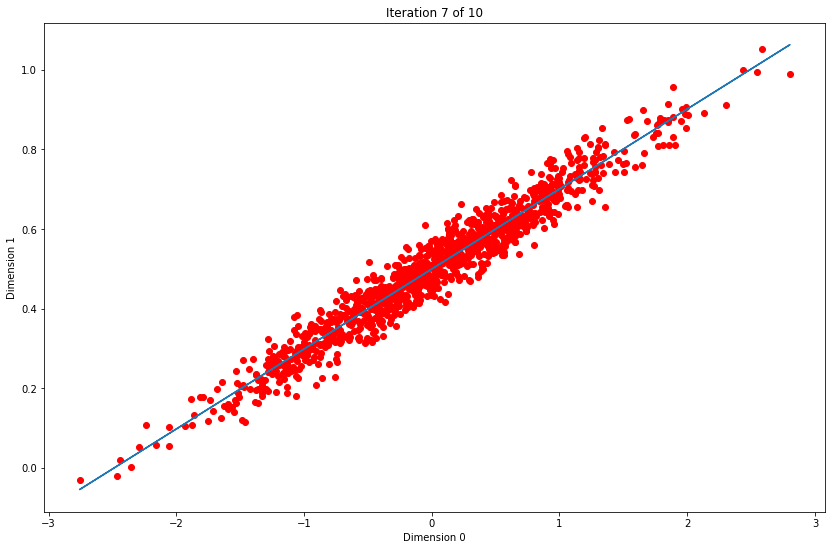


ITERATION 8
W = 0.20060359
b = 0.4994865
loss = 0.0015173181


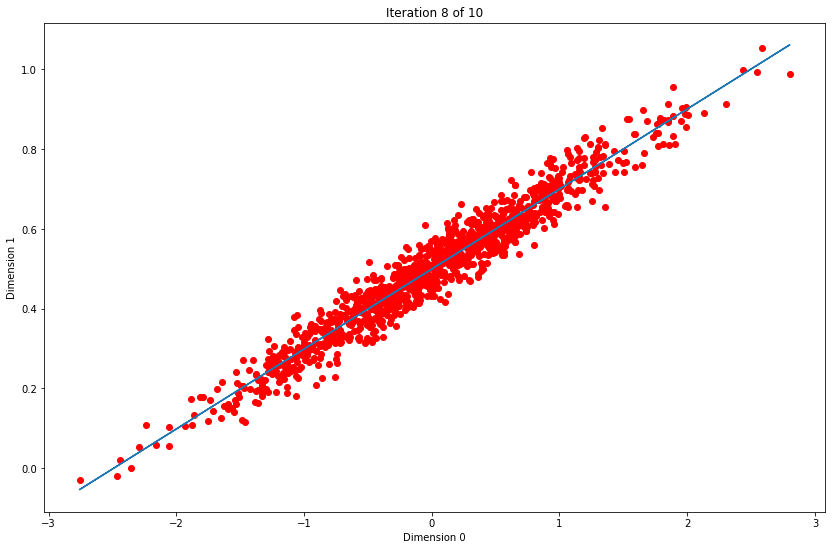


ITERATION 9
W = 0.20047696
b = 0.49948925
loss = 0.0015172963


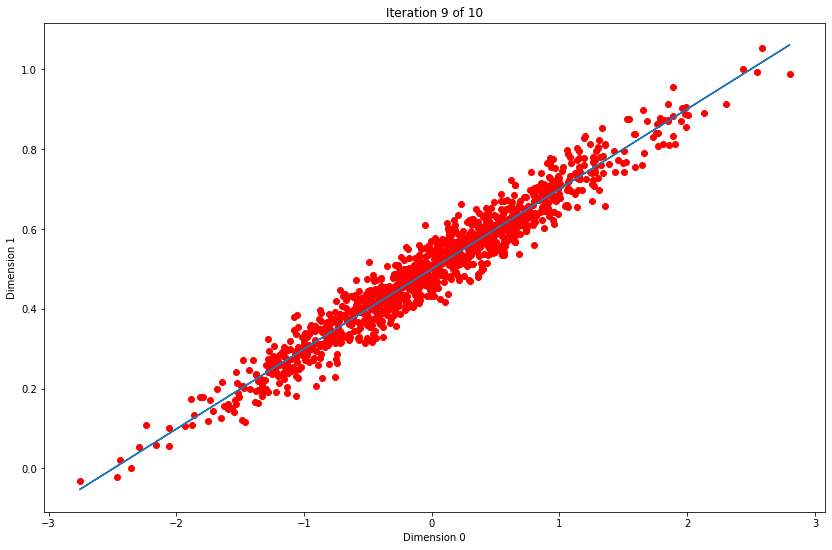


ITERATION 10
W = 0.2004319
b = 0.49949023
loss = 0.0015172935


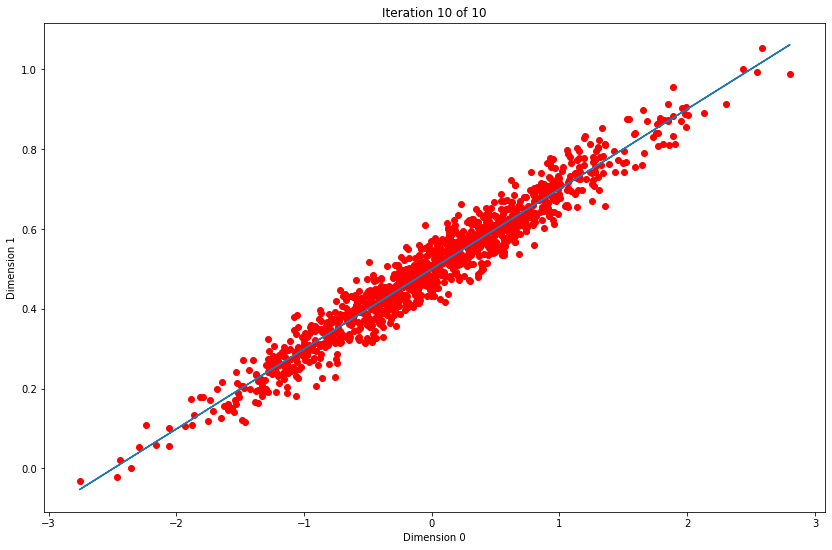

In [12]:
# Start iterating i.e. the training process
num_iterations = 10
for step in range(num_iterations):
    # Run the session
    sess.run(train)
    # Print the progress of training. The 'loss' parameter should continually decrease as we go through iterations
    print('\nITERATION', step+1)
    print('W =', sess.run(W)[0])
    print('b =', sess.run(b)[0])
    print('loss =', sess.run(loss))
    
    # Plot the generated input data and overlay the predicted model on top.
    # Plot input data
    plt.plot(x_data, y_data, 'ro')
    # Plot the predicted output line
    plt.plot(x_data, sess.run(W) * x_data + sess.run(b))
    
    # Set plotting parameters
    plt.xlabel('Dimension 0')
    plt.ylabel('Dimension 1')
    plt.title('Iteration ' + str(step+1) + ' of ' + str(num_iterations))
    plt.show()

## Building an image classifier using a single layer neural network

In [16]:
# import tensorflow as tf
import tensorflow as tf
old_v = tf.logging.get_verbosity()
tf.logging.set_verbosity(tf.logging.ERROR)

tf.disable_v2_behavior()
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

tf.logging.set_verbosity(old_v)

# The images are 28x28, so create the input layer 
# with 784 neurons (28x28=784) 
x = tf.placeholder(tf.float32, [None, 784])

# Create a layer with weights and biases. There are 10 distinct 
# digits, so the output layer should have 10 classes
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

# Create the equation for 'y' using y = W*x + b
y = tf.matmul(x, W) + b

# Define the entropy loss and the gradient descent optimizer
y_loss = tf.placeholder(tf.float32, [None, 10])
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=y_loss))
optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)

# Initialize all the variables 
init = tf.initialize_all_variables()

# Create a session
session = tf.Session()
session.run(init)

# Start training
num_iterations = 1200
batch_size = 90
for _ in range(num_iterations):
    # Get the next batch of images
    x_batch, y_batch = mnist.train.next_batch(batch_size)

    # Train on this batch of images
    session.run(optimizer, feed_dict = {x: x_batch, y_loss: y_batch})

# Compute the accuracy using test data
predicted = tf.equal(tf.argmax(y, 1), tf.argmax(y_loss, 1))
accuracy = tf.reduce_mean(tf.cast(predicted, tf.float32))
print('\nAccuracy =', session.run(accuracy, feed_dict = {
        x: mnist.test.images, 
        y_loss: mnist.test.labels}))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


ValueError: No gradients provided for any variable, check your graph for ops that do not support gradients, between variables ["<tf.Variable 'Variable:0' shape=(1,) dtype=float32_ref>", "<tf.Variable 'Variable_1:0' shape=(1,) dtype=float32_ref>", "<tf.Variable 'Variable_2:0' shape=(784, 10) dtype=float32_ref>", "<tf.Variable 'Variable_3:0' shape=(10,) dtype=float32_ref>", "<tf.Variable 'Variable_4:0' shape=(784, 10) dtype=float32_ref>", "<tf.Variable 'Variable_5:0' shape=(10,) dtype=float32_ref>", "<tf.Variable 'Variable_6:0' shape=(784, 10) dtype=float32_ref>", "<tf.Variable 'Variable_7:0' shape=(10,) dtype=float32_ref>", "<tf.Variable 'Variable_8:0' shape=(784, 10) dtype=float32_ref>", "<tf.Variable 'Variable_9:0' shape=(10,) dtype=float32_ref>"] and loss Tensor("Mean_1:0", shape=(), dtype=float32).

In [19]:
input_dir = './mnist_data'
def get_weights(shape):
    data = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(data)

def get_biases(shape):
    data = tf.constant(0.1, shape=shape)
    return tf.Variable(data)

def create_layer(shape):
    # Get the weights and biases 
    W = get_weights(shape)
    b = get_biases([shape[-1]])

    return W, b

def convolution_2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], 
            padding='SAME')

def max_pooling(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], 
            strides=[1, 2, 2, 1], padding='SAME')


# Get the MNIST data
mnist = input_data.read_data_sets(input_dir, one_hot=True)

# The images are 28x28, so create the input layer 
# with 784 neurons (28x28=784) 
x = tf.placeholder(tf.float32, [None, 784])

# Reshape 'x' into a 4D tensor 
x_image = tf.reshape(x, [-1, 28, 28, 1])

# Define the first convolutional layer
W_conv1, b_conv1 = create_layer([5, 5, 1, 32])

# Convolve the image with weight tensor, add the 
# bias, and then apply the ReLU function
h_conv1 = tf.nn.relu(convolution_2d(x_image, W_conv1) + b_conv1)

# Apply the max pooling operator
h_pool1 = max_pooling(h_conv1)

# Define the second convolutional layer
W_conv2, b_conv2 = create_layer([5, 5, 32, 64])

# Convolve the output of previous layer with the 
# weight tensor, add the bias, and then apply 
# the ReLU function
h_conv2 = tf.nn.relu(convolution_2d(h_pool1, W_conv2) + b_conv2)

# Apply the max pooling operator
h_pool2 = max_pooling(h_conv2)

# Define the fully connected layer
W_fc1, b_fc1 = create_layer([7 * 7 * 64, 1024])

# Reshape the output of the previous layer
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])

# Multiply the output of previous layer by the 
# weight tensor, add the bias, and then apply 
# the ReLU function
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

# Define the dropout layer using a probability placeholder
# for all the neurons
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# Define the readout layer (output layer)
W_fc2, b_fc2 = create_layer([1024, 10])
y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

# Define the entropy loss and the optimizer
y_loss = tf.placeholder(tf.float32, [None, 10])
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_conv, logits=y_loss))
optimizer = tf.train.AdamOptimizer(1e-4).minimize(loss)

# Define the accuracy computation
predicted = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_loss, 1))
accuracy = tf.reduce_mean(tf.cast(predicted, tf.float32))

# Create and run a session
sess = tf.InteractiveSession()
init = tf.initialize_all_variables()
sess.run(init)

# Start training
num_iterations = 21000
batch_size = 75
print('\nTraining the model....')
for i in range(num_iterations):
    # Get the next batch of images
    batch = mnist.train.next_batch(batch_size)

    # Print progress
    if i % 50 == 0:
        cur_accuracy = accuracy.eval(feed_dict = {
                x: batch[0], y_loss: batch[1], keep_prob: 1.0})
        print('Iteration', i, ', Accuracy =', cur_accuracy)

    # Train on the current batch
    optimizer.run(feed_dict = {x: batch[0], y_loss: batch[1], keep_prob: 0.5})

# Compute accuracy using test data
print('Test accuracy =', accuracy.eval(feed_dict = {
        x: mnist.test.images, y_loss: mnist.test.labels, 
        keep_prob: 1.0}))

Extracting ./mnist_data\train-images-idx3-ubyte.gz
Extracting ./mnist_data\train-labels-idx1-ubyte.gz
Extracting ./mnist_data\t10k-images-idx3-ubyte.gz
Extracting ./mnist_data\t10k-labels-idx1-ubyte.gz


ValueError: No gradients provided for any variable, check your graph for ops that do not support gradients, between variables ["<tf.Variable 'Variable:0' shape=(1,) dtype=float32_ref>", "<tf.Variable 'Variable_1:0' shape=(1,) dtype=float32_ref>", "<tf.Variable 'Variable_2:0' shape=(784, 10) dtype=float32_ref>", "<tf.Variable 'Variable_3:0' shape=(10,) dtype=float32_ref>", "<tf.Variable 'Variable_4:0' shape=(784, 10) dtype=float32_ref>", "<tf.Variable 'Variable_5:0' shape=(10,) dtype=float32_ref>", "<tf.Variable 'Variable_6:0' shape=(784, 10) dtype=float32_ref>", "<tf.Variable 'Variable_7:0' shape=(10,) dtype=float32_ref>", "<tf.Variable 'Variable_8:0' shape=(784, 10) dtype=float32_ref>", "<tf.Variable 'Variable_9:0' shape=(10,) dtype=float32_ref>", "<tf.Variable 'Variable_10:0' shape=(5, 5, 1, 32) dtype=float32_ref>", "<tf.Variable 'Variable_11:0' shape=(32,) dtype=float32_ref>", "<tf.Variable 'Variable_12:0' shape=(5, 5, 32, 64) dtype=float32_ref>", "<tf.Variable 'Variable_13:0' shape=(64,) dtype=float32_ref>", "<tf.Variable 'Variable_14:0' shape=(3136, 1024) dtype=float32_ref>", "<tf.Variable 'Variable_15:0' shape=(1024,) dtype=float32_ref>", "<tf.Variable 'Variable_16:0' shape=(1024, 10) dtype=float32_ref>", "<tf.Variable 'Variable_17:0' shape=(10,) dtype=float32_ref>", "<tf.Variable 'Variable_18:0' shape=(5, 5, 1, 32) dtype=float32_ref>", "<tf.Variable 'Variable_19:0' shape=(32,) dtype=float32_ref>", "<tf.Variable 'Variable_20:0' shape=(5, 5, 32, 64) dtype=float32_ref>", "<tf.Variable 'Variable_21:0' shape=(64,) dtype=float32_ref>", "<tf.Variable 'Variable_22:0' shape=(3136, 1024) dtype=float32_ref>", "<tf.Variable 'Variable_23:0' shape=(1024,) dtype=float32_ref>", "<tf.Variable 'Variable_24:0' shape=(1024, 10) dtype=float32_ref>", "<tf.Variable 'Variable_25:0' shape=(10,) dtype=float32_ref>"] and loss Tensor("Mean_2:0", shape=(), dtype=float32).

## CNN on CIFAR10 Dataset

In [23]:
import keras
import tensorflow as tf

# Ensure to set the image dimension appropriately
K = keras.backend.backend()
# if K=='tensorflow':
#     keras.backend.set_image_dim_ordering('tf')
# else:
#     keras.backend.set_image_dim_ordering('th')

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np
np.random.seed(2017)

from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Dropout, Activation, Convolution2D, MaxPooling2D, Flatten
from keras.utils import np_utils
from keras.preprocessing import sequence

from keras import backend as K
from IPython.display import SVG, display
from keras.utils.visualize_util import model_to_dot, plot

ModuleNotFoundError: No module named 'keras.utils.visualize_util'

In [4]:
img_rows, img_cols = 32, 32
img_channels = 3

batch_size = 256
nb_classes = 10
nb_epoch = 4
nb_filters = 10
nb_conv = 3
nb_pool = 2

# if K.image_dim_ordering() == 'th':
#     input_shape = (3, img_rows, img_cols)
# else:
#     input_shape = (img_rows, img_cols, 3)
input_shape = (img_rows, img_cols, 3)    
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

170500096/170498071 [==============================] - 59s 0us/step
X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [5]:
# define two groups of layers: feature (convolutions) and classification (dense)
feature_layers = [
    Convolution2D(nb_filters, nb_conv, nb_conv, input_shape=input_shape),
    Activation('relu'),
    Convolution2D(nb_filters, nb_conv, nb_conv),
    Activation('relu'),
    MaxPooling2D(pool_size=(nb_pool, nb_pool)),
    Flatten(),
]
classification_layers = [
    Dense(512),
    Activation('relu'),
    Dense(nb_classes),
    Activation('softmax')
]

# create complete model
model = Sequential(feature_layers + classification_layers)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), input_shape=(32, 32, 3...)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3))`
  """


In [8]:
model.compile(loss='categorical_crossentropy', optimizer="adadelta", metrics=['accuracy'])

# SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [9]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 10)        280       
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 10)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 10)        910       
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 10)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1960)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)              

In [10]:
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), 
          nb_epoch=nb_epoch, batch_size=batch_size, verbose=2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 50000 samples, validate on 10000 samples
Epoch 1/4
 - 16s - loss: 1.8380 - accuracy: 0.3454 - val_loss: 1.6794 - val_accuracy: 0.4024
Epoch 2/4
 - 16s - loss: 1.4186 - accuracy: 0.4985 - val_loss: 1.3990 - val_accuracy: 0.4998
Epoch 3/4
 - 18s - loss: 1.2523 - accuracy: 0.5595 - val_loss: 1.2261 - val_accuracy: 0.5659
Epoch 4/4
 - 18s - loss: 1.1244 - accuracy: 0.6055 - val_loss: 1.1915 - val_accuracy: 0.5753


In [11]:
# visualization of layers
def draw(data, row, col, n):
    plt.subplot(row, col, n)    
    plt.imshow(data)

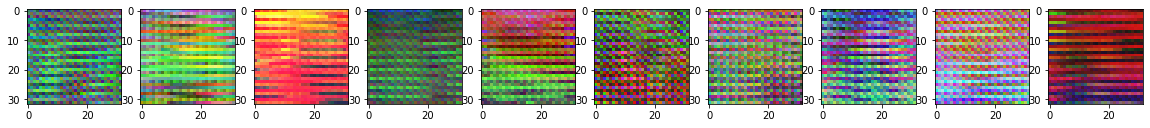

In [12]:
# Input layer (original image)
show_size = 10
plt.figure(figsize=(20,20))
for i in range(show_size):
    draw(X_train[i].reshape(3, 32, 32).transpose(1, 2, 0), 1, show_size, i+1)
plt.show()

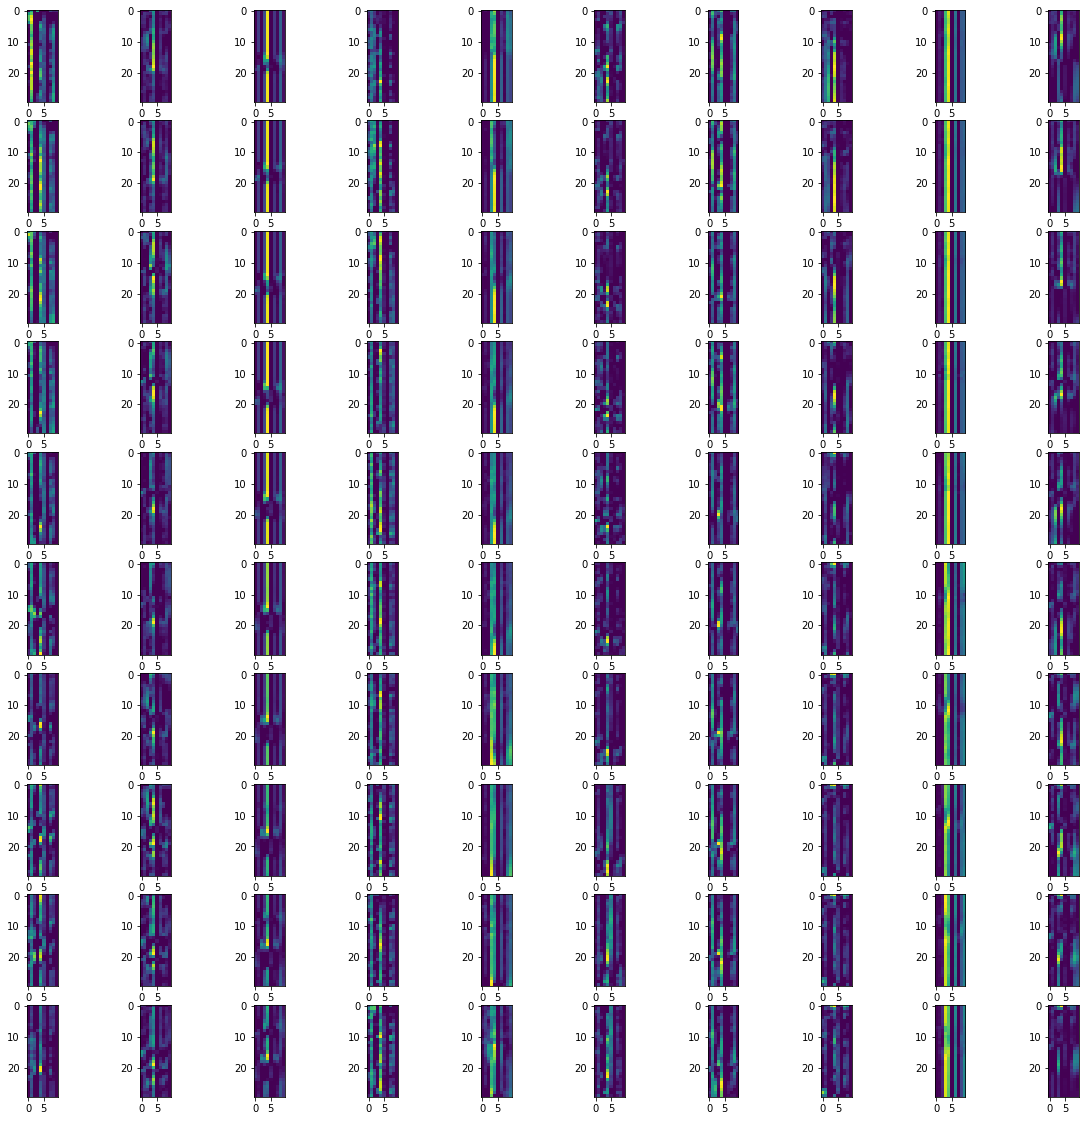

In [19]:
# First layer
get_first_layer_output = K.function([model.layers[0].input],
                          [model.layers[1].output])
first_layer = get_first_layer_output([X_train[0:show_size]])[0]

plt.figure(figsize=(20,20))

for img_index, filters in enumerate(first_layer, start=1):
    for filter_index, mat in enumerate(filters):
        pos = (filter_index)*show_size+img_index
        if (pos <= 100):
            draw(mat, nb_filters, show_size, pos)
plt.show()

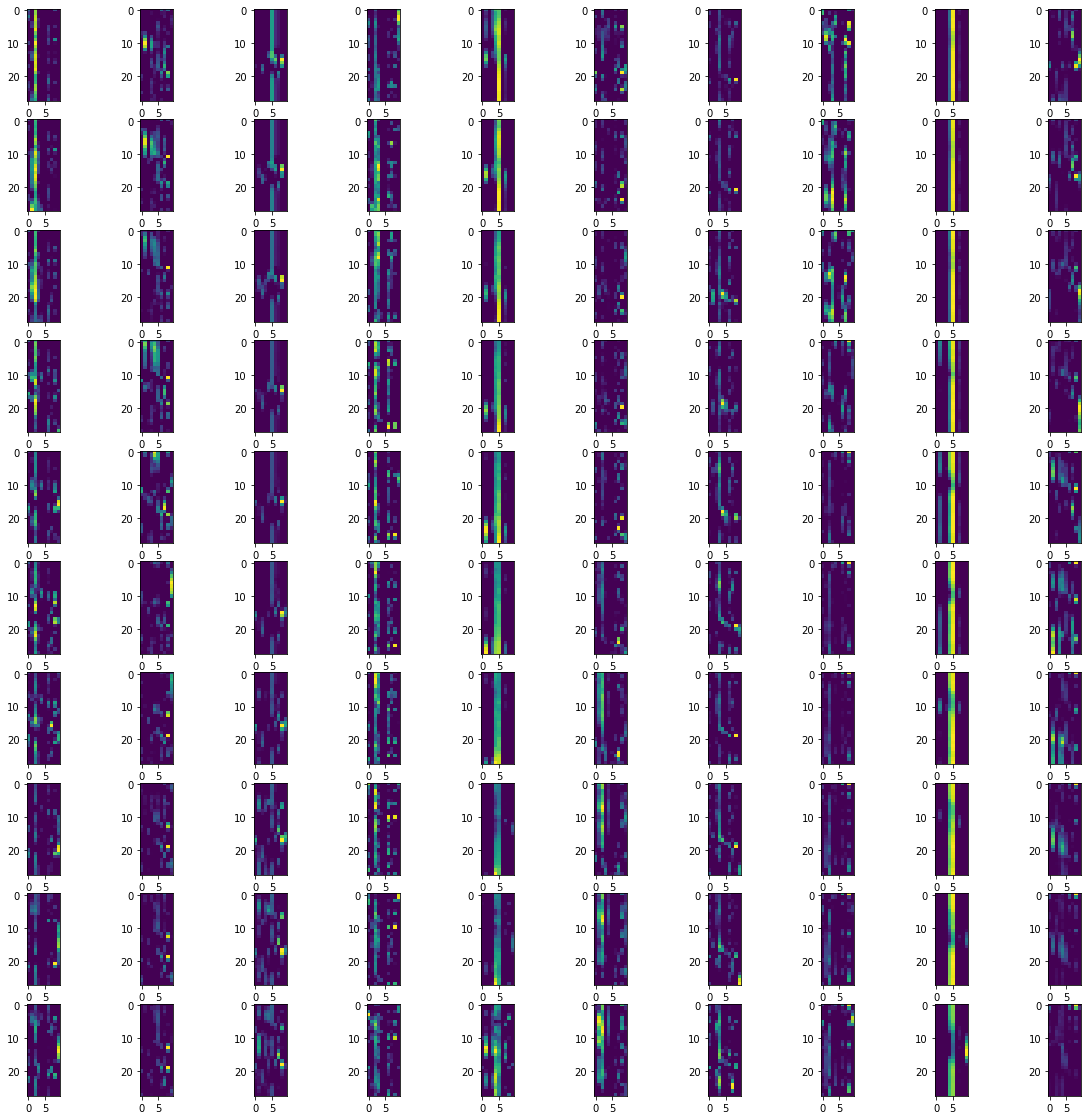

In [20]:
# Second layer
get_second_layer_output = K.function([model.layers[0].input],
                          [model.layers[3].output])
second_layers = get_second_layer_output([X_train[0:show_size]])[0]

plt.figure(figsize=(20,20))

for img_index, filters in enumerate(second_layers, start=1):
    for filter_index, mat in enumerate(filters):
        pos = (filter_index)*show_size+img_index
        if (pos <= 100):
            draw(mat, nb_filters, show_size, pos)
plt.show()

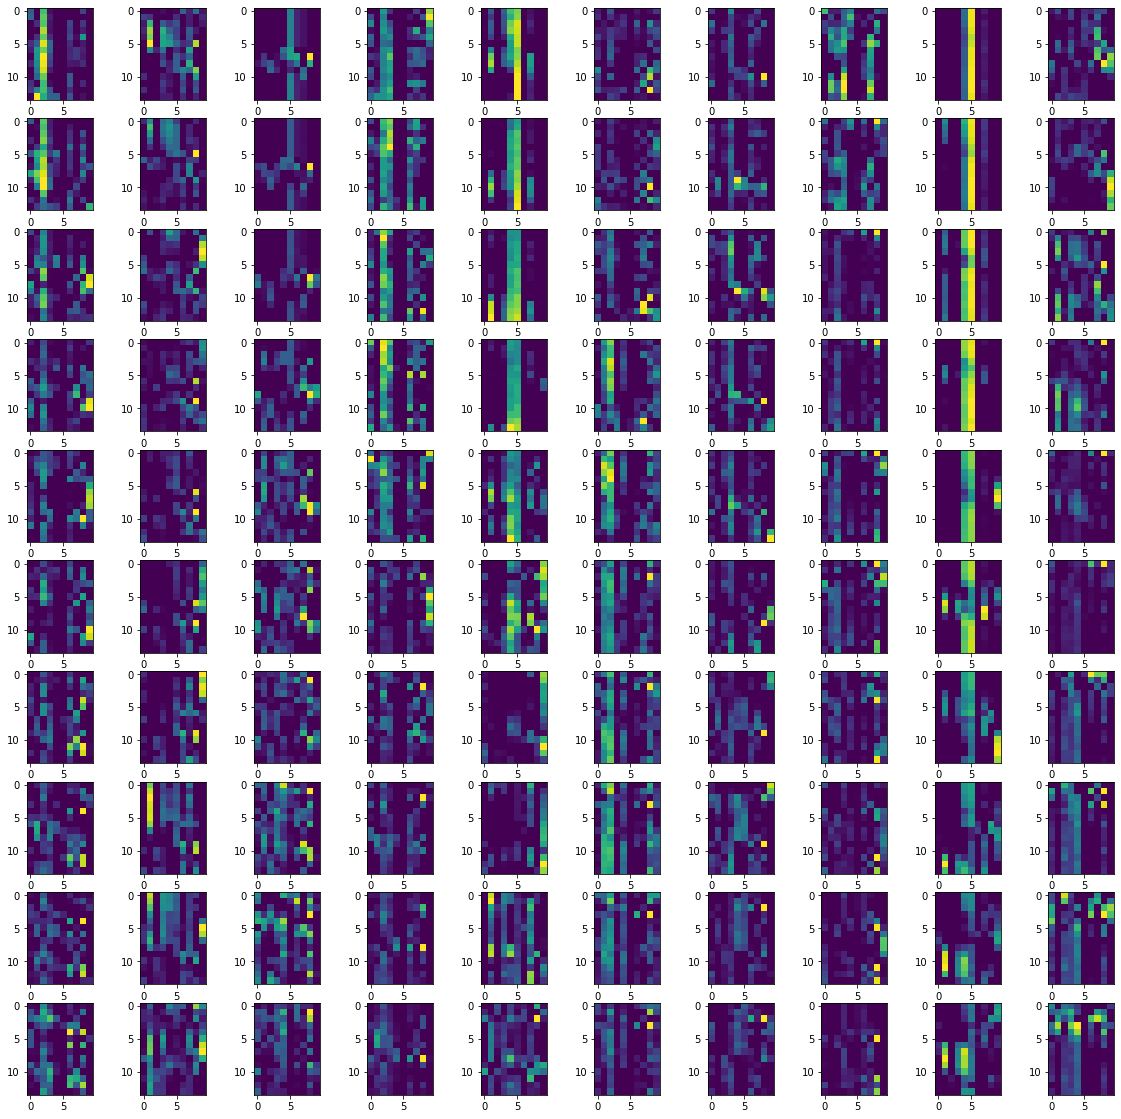

In [21]:
# Third layer
get_third_layer_output = K.function([model.layers[0].input],
                          [model.layers[4].output])
third_layers = get_third_layer_output([X_train[0:show_size]])[0]

plt.figure(figsize=(20,20))

for img_index, filters in enumerate(third_layers, start=1):
    for filter_index, mat in enumerate(filters):
        pos = (filter_index)*show_size+img_index
        mat_size = mat.shape[1]
        if (pos <= 100):
            draw(mat, nb_filters, show_size, pos)
plt.show()

# CNN on MNIST data

In [1]:
import keras

K = keras.backend.backend()

Using TensorFlow backend.


In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np
np.random.seed(2017)

from keras import backend as K
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Convolution2D, MaxPooling2D, Flatten
from keras.utils import np_utils
from keras.preprocessing import sequence

from keras import backend as K
from IPython.display import SVG, display
from keras.utils import model_to_dot

In [10]:
img_rows, img_cols = 28, 28
nb_classes = 10

nb_filters = 5 # the number of filters
nb_pool = 2 # window size of pooling
nb_conv = 3 # window or kernel size of filter
nb_epoch = 5

input_shape = (img_rows, img_cols, 1)
    
# data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols) 
X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

X_train shape: (60000, 1, 28, 28)
60000 train samples
10000 test samples


In [11]:
# define two groups of layers: feature (convolutions) and classification (dense)
feature_layers = [
    Convolution2D(nb_filters, nb_conv, nb_conv, input_shape=input_shape),
    Activation('relu'),
    Convolution2D(nb_filters, nb_conv, nb_conv),
    Activation('relu'),
    MaxPooling2D(pool_size=(nb_pool, nb_pool)),
    Dropout(0.25),
    Flatten(),
]
classification_layers = [
    Dense(128),
    Activation('relu'),
    Dropout(0.5),
    Dense(nb_classes),
    Activation('softmax')
]

# create complete model
model = Sequential(feature_layers + classification_layers)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(5, (3, 3), input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(5, (3, 3))`
  """


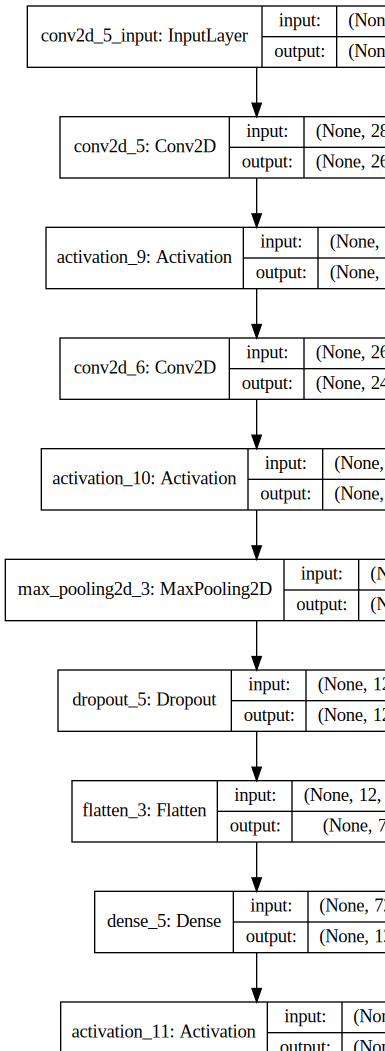

In [18]:
model.compile(loss='categorical_crossentropy', optimizer="adadelta", metrics=['accuracy'])

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [13]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 5)         50        
_________________________________________________________________
activation_9 (Activation)    (None, 26, 26, 5)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 5)         230       
_________________________________________________________________
activation_10 (Activation)   (None, 24, 24, 5)         0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 5)         0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 12, 12, 5)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 720)              

In [14]:
model.fit(X_train, Y_train, nb_epoch=nb_epoch, batch_size=256, verbose=2,  validation_split=0.2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


ValueError: Error when checking input: expected conv2d_5_input to have shape (28, 28, 1) but got array with shape (1, 28, 28)

In [19]:
# visualization
def draw(data, row, col, n):
    plt.subplot(row, col, n)    
    plt.imshow(data, cmap=plt.cm.gray_r)
    plt.axis('off')

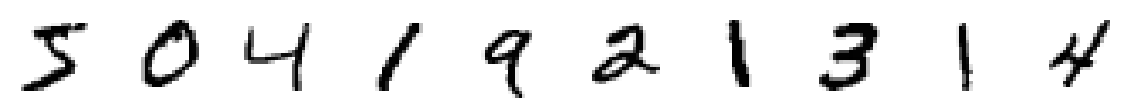

In [20]:
show_size = 10
plt.figure(figsize=(20,20))

for i in range(show_size):
    draw(X_train[i].reshape(28,28), 1, show_size, i+1)
plt.show()

In [22]:
get_first_layer_output = K.function([model.layers[0].input], [model.layers[1].output])
first_layer = get_first_layer_output([X_train[0:show_size]])[0]

plt.figure(figsize=(20,20))
print ('first layer shape: ', first_layer.shape)

for img_index, filters in enumerate(first_layer, start=1):
    for filter_index, mat in enumerate(filters):
        pos = (filter_index)*10+img_index
        draw(mat, nb_filters, show_size, pos)
plt.tight_layout()        
plt.show()

InvalidArgumentError:  Computed output size would be negative: -1 [input_size: 1, effective_filter_size: 3, stride: 1]
	 [[node activation_9/Relu (defined at C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\ops.py:1751) ]] [Op:__inference_keras_scratch_graph_966]

Function call stack:
keras_scratch_graph
